# Introducing CNNS with TensorFlow


In this notebook, we're going to see how we can use ```TensorFlow``` to build convolutional neural networks to work with colour image data.

## Load libraries

In [1]:
# data tools
import os
import numpy as np
import matplotlib.pyplot as plt

# sklearn tools
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

# tf tools
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, 
                                     MaxPooling2D, 
                                     Activation, 
                                     Flatten, 
                                     Dense)
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K

2023-03-31 13:24:34.560955: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


__Define plotting function__

In [2]:
def plot_history(H, epochs):
    plt.style.use("seaborn-colorblind")

    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
    plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss", linestyle=":")
    plt.title("Loss curve")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.tight_layout()
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc", linestyle=":")
    plt.title("Accuracy curve")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.tight_layout()
    plt.legend()
    plt.show()

__Load cifar10 data__

We first want to load the ```cifar-10``` dataset, normalize the values, and then binarize the labels.

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 7s 0us/step


**Question:** As an experiment, see what happens if you try to train the model with un-scaled images. Does it affect performance?

In [4]:
X_train = X_train/255
X_test = X_test/255

In [5]:
# create one-hot encodings
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

We'll also manually create a list of labels for when we come to print the classification report later.

In [6]:
# initialize label names for CIFAR-10 dataset
label_names = ["airplane", "automobile", 
              "bird", "cat", 
              "deer", "dog", 
              "frog", "horse", 
              "ship", "truck"]

## ShallowNet 

We're going to begin by creating one of the simplest CNN architectures with only a single convolutional layer. This type of architecture is known as the ShallowNet architecture:
>INPUT => CONV => ReLU => FC

In [7]:
#initalise model
model = Sequential()

# define CONV => ReLU
model.add(Conv2D(32, 
                (3,3),
                padding = "same",
                input_shape = (32,2,2)))
model.add(Activation("relu"))
          
# FC classifier
model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dense(10))
model.add(Activation("softmax"))

__Compile model__

We then compile our model using some of the same arguments we've already seen in different contexts.

In [8]:
sgd = SGD(learning_rate =.001)
model.compile(loss="categorical_crossentropy",
              optimizer=sgd,
              metrics=["accuracy"])

__Model summary__

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 128)               4194432   
                                                                 
 activation_1 (Activation)   (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
 activation_2 (Activation)   (None, 10)                0

__Plot model__

In [10]:
plot_model(model, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


__Train model__

running this on 16CPU machine takes around 8 minutes 
Finally, we train the model on the data and get our predictions.

In [21]:
H = model.fit(X_train, 
              y_train,
              validation_split=0.1,
              batch_size=32,
              epochs=20,
              verbose=1)

Epoch 1/20
704/704 [==============================] - 26s 37ms/step - loss: 1.2999 - accuracy: 0.5418 - val_loss: 1.3448 - val_accuracy: 0.5172
Epoch 2/20
704/704 [==============================] - 26s 37ms/step - loss: 1.2919 - accuracy: 0.5446 - val_loss: 1.3756 - val_accuracy: 0.5132
Epoch 3/20
704/704 [==============================] - 27s 38ms/step - loss: 1.2842 - accuracy: 0.5463 - val_loss: 1.3394 - val_accuracy: 0.5246
Epoch 4/20
704/704 [==============================] - 27s 38ms/step - loss: 1.2756 - accuracy: 0.5512 - val_loss: 1.3756 - val_accuracy: 0.5126
Epoch 5/20
704/704 [==============================] - 27s 38ms/step - loss: 1.2686 - accuracy: 0.5534 - val_loss: 1.3049 - val_accuracy: 0.5396
Epoch 6/20
704/704 [==============================] - 27s 38ms/step - loss: 1.2604 - accuracy: 0.5566 - val_loss: 1.3945 - val_accuracy: 0.4956
Epoch 7/20
704/704 [==============================] - 26s 38ms/step - loss: 1.2528 - accuracy: 0.5585 - val_loss: 1.3075 - val_accuracy:

__Evaluate model__

In [25]:
predictions = model.predict(X_test, batch_size=32)

157/157 [==============================] - 1s 9ms/step


In [26]:
print(classification_report(y_test.argmax(axis=1),
                            predictions.argmax(axis=1),
                            target_names=label_names))

              precision    recall  f1-score   support

    airplane       0.42      0.83      0.56      1000
  automobile       0.77      0.50      0.61      1000
        bird       0.48      0.44      0.46      1000
         cat       0.43      0.42      0.42      1000
        deer       0.54      0.42      0.47      1000
         dog       0.53      0.42      0.47      1000
        frog       0.72      0.58      0.64      1000
       horse       0.66      0.60      0.63      1000
        ship       0.76      0.50      0.60      1000
       truck       0.49      0.75      0.59      1000

    accuracy                           0.55     10000
   macro avg       0.58      0.55      0.55     10000
weighted avg       0.58      0.55      0.55     10000



We can also use the ```plot_history()``` function available from ```TensorFlow``` to see how our model performs during training.

These plots can tell us *a lot* about whether a model is under- or over-fiting the data. You read more at [this fantastic blog post](https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/). 

Other useful blogs are [here](https://rstudio-conf-2020.github.io/dl-keras-tf/notebooks/learning-curve-diagnostics.nb.html) and there's a good video overview [here](https://youtu.be/p3CcfIjycBA).

The two results track each othe rquite smoothly, performancence should be increasing, and loss should be decreasing

/tmp/ipykernel_2019/3716877966.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-colorblind")


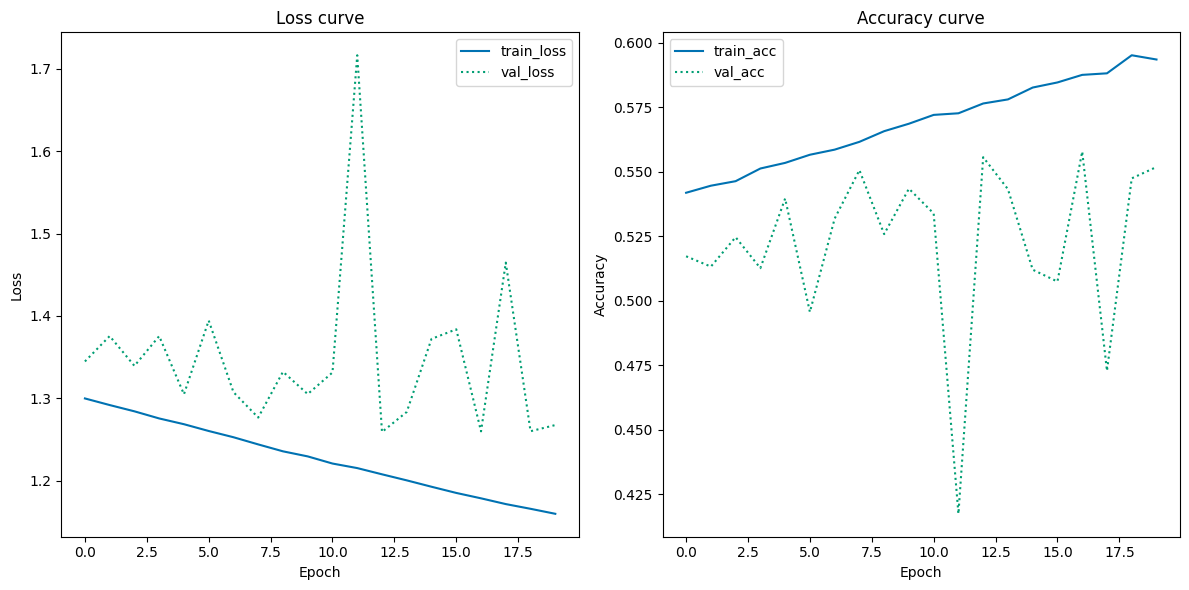

In [27]:
plot_history(H, 20)

## LeNet

Next, we'll look at a slightly more complicated CNN architecture, known as ```LeNet``` after its creator Yann LeCun, who is now Chief AI Scientist at Meta. You can read more [here](https://en.wikipedia.org/wiki/LeNet).
>INPUT => CONV => ReLU => MAXPOOL => CONV => ReLU => MAXPOOL => FC => ReLU => FC

__Define model__

In [15]:
# define model
model = Sequential()

# first set of layers CONV => RELU => MAXPOOL
model.add(Conv2D(32, (3,3),
                 padding="same",
                 input_shape=(32,32,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2),
                       strides = (2,2)))

# second set of layers CONV => RELU => MAXPOOL
model.add(Conv2D(50, (5,5),
                 padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2),
                       strides = (2,2)))

# FC => RELU
model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))

# softmax classifier
model.add(Dense(10))
model.add(Activation("softmax"))

__Compile model__

In [16]:
sgd = SGD(learning_rate=0.001)
model.compile(loss="categorical_crossentropy",
              optimizer=sgd,
              metrics=["accuracy"])

__Model summary__

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_3 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 50)        40050     
                                                                 
 activation_4 (Activation)   (None, 16, 16, 50)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 50)         0         
 2D)                                                  

__Train model__

In [18]:
# train model
H = model.fit(X_train, 
              y_train, 
              validation_split=0.1, 
              batch_size=32,
              epochs=20,
              verbose=1)

Epoch 1/20
1407/1407 [==============================] - 30s 21ms/step - loss: 2.2589 - accuracy: 0.1818 - val_loss: 2.1989 - val_accuracy: 0.2502
Epoch 2/20
1407/1407 [==============================] - 29s 21ms/step - loss: 2.1003 - accuracy: 0.2684 - val_loss: 2.0068 - val_accuracy: 0.2954
Epoch 3/20
1407/1407 [==============================] - 29s 21ms/step - loss: 1.9520 - accuracy: 0.3098 - val_loss: 1.9292 - val_accuracy: 0.3186
Epoch 4/20
1407/1407 [==============================] - 29s 20ms/step - loss: 1.8798 - accuracy: 0.3413 - val_loss: 1.8660 - val_accuracy: 0.3360
Epoch 5/20
1407/1407 [==============================] - 29s 21ms/step - loss: 1.8179 - accuracy: 0.3647 - val_loss: 1.7893 - val_accuracy: 0.3640
Epoch 6/20
1407/1407 [==============================] - 29s 21ms/step - loss: 1.7593 - accuracy: 0.3872 - val_loss: 1.7500 - val_accuracy: 0.3656
Epoch 7/20
1407/1407 [==============================] - 29s 21ms/step - loss: 1.7031 - accuracy: 0.4040 - val_loss: 1.7054 -

/tmp/ipykernel_2019/3716877966.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-colorblind")


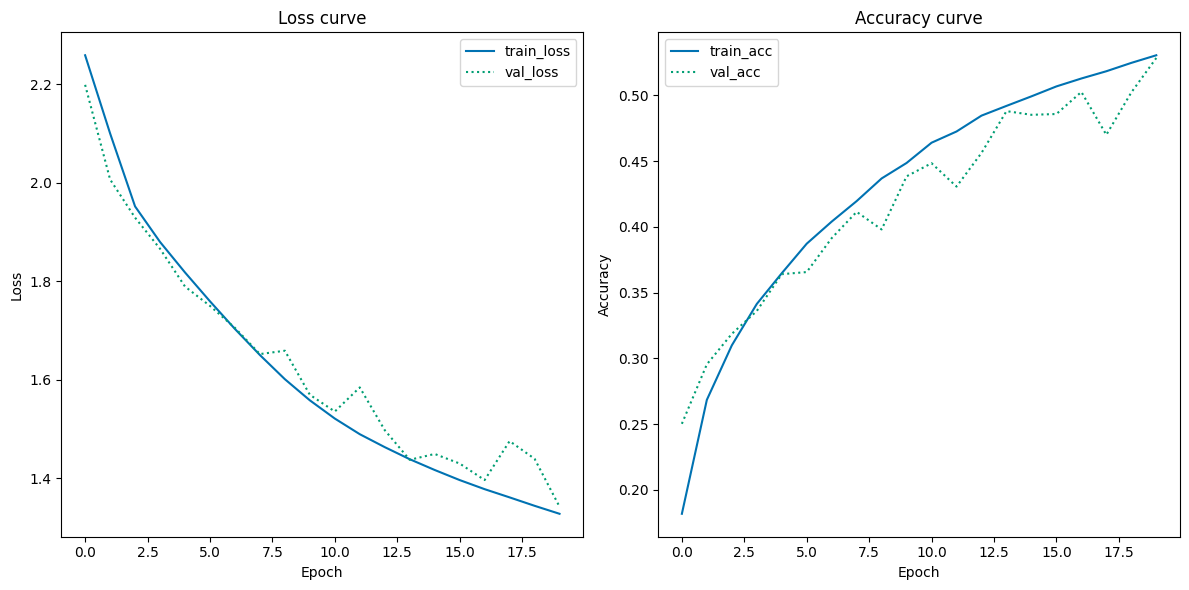

In [19]:
plot_history(H,20)

In [20]:
predictions = model.predict(X_test, batch_size=32)
print(classification_report(y_test.argmax(axis=1),
                            predictions.argmax(axis=1),
                            target_names=label_names))

313/313 [==============================] - 2s 6ms/step
              precision    recall  f1-score   support

    airplane       0.60      0.54      0.57      1000
  automobile       0.66      0.60      0.63      1000
        bird       0.39      0.41      0.40      1000
         cat       0.42      0.21      0.28      1000
        deer       0.43      0.49      0.46      1000
         dog       0.51      0.37      0.43      1000
        frog       0.49      0.72      0.58      1000
       horse       0.51      0.65      0.57      1000
        ship       0.60      0.68      0.64      1000
       truck       0.60      0.50      0.54      1000

    accuracy                           0.52     10000
   macro avg       0.52      0.52      0.51     10000
weighted avg       0.52      0.52      0.51     10000

